# U.S. Medical Insurance Costs

<h1><b> Import Python Libraries </b></h1>
<b1> Using matplotlib inline allows us to display our barplots after executing the cell </b1>

In [2]:
import csv
import math
import statistics
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

<h1><b> Create dictionary and list using csv library</b></h1>
The first step is to use the csv dict reader to create a dictionary using row reader then append the dictionary to insurance list.
<h2><b> Create a function to compare two groups within the dataset </b></h2>
From there, I built out a function to compare any two groups within a category, and print out a summary report and box plots with basic statistics.

Estimated cost for an individual from northeast at age 64 is: $19361.
Estimated cost for an individual from northwest at age 64 is: $19016.
Summary statistics for insurance costs and age for the northeast and northwest regions:
     group 1: northeast
     -----------------------------
     northeast size = 324 
     northeast number of males = 163
     northeast number of females = 161
     ----northeast region -----INSURANCE CHARGES:
     northeast median charges = $10057.5
     northeast mode charges = $1704
     -----northeast region-----AGE:
     mean northeast region age: 39.26851851851852
     median northeast  region age: 39.5
     mode northeast region age: 18
     -----northeast region-----BMI:
     median northeast BMI: 28.0
     mode northeast BMI: 28
     
     group 2: northwest
     ------------------------------
     northwest size = 325
     northwest number of males = 161
     northwest number of females = 164
     ----northwest region -----INSURANCE CHARGES:
     nor

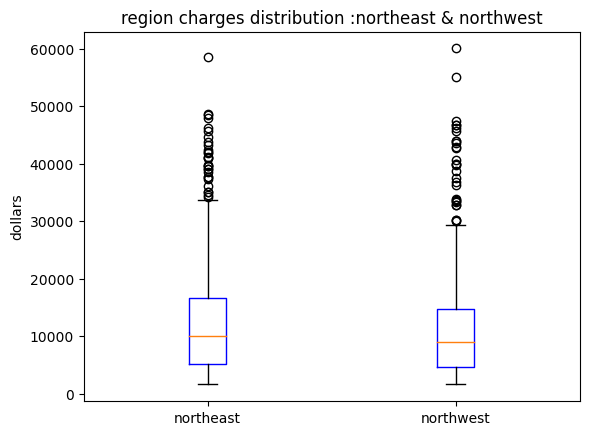

In [3]:
age_list = []
insurance_dict = {}
numerical_id_list = []
insurance_list = []
with open("insurance.csv",newline = "") as insurance_data:
    reader = csv.DictReader(insurance_data)
    for row in reader:
        #print(row['age'])
        #numerical_ID = range(len(
        age = row['age']
        # numerical_ID = len(row["age"])
        sex = row['sex']
        children = row['children']
        BMI = row["bmi"]
        smoker = row["smoker"]
        region = row["region"]
        charges = row["charges"]
        #print(numerical_ID)
        #print(sex)
        #print(children)
        age_list.append(int(age))
        numerical_ID_len = len(age_list)
        insurance_dict = {"age":int(age),"sex":sex, "children":int(children),"BMI": float(BMI),"smoker": smoker,"region": region,"charges": float(charges)}
       #insurance_dict[age] = {"age":int(age),"sex":sex, "children":int(children),"BMI": float(BMI),"smoker": smoker,"region": region,"charges": float(charges)}
        insurance_list.append(insurance_dict)


 
total = 0
total_charges = 0
smoker_charges = 0
non_smoker_charges = 0
low_to_normal_BMI_charges = 0
overweight_charges = 0
smoker_list = []
non_smoker_list = []
normal_to_low_BMI = []
overweight_BMI = []
non_smoker_age_list = []
smoker_age_list = []
for i in insurance_list:
    total += (i["age"])
    total_charges += (i["charges"])
    age_len = len(insurance_list)
    age_avg = total/age_len
    avg_charges = total_charges/age_len
    BMI = i["BMI"]
    
    #print(BMI)
    #f BMI > 19.0:
     #   print(BMI)
    if i["smoker"] == "yes":
        smoker_charges += i["charges"]
        smoker_list.append(i)
        avg_smoker_charges = smoker_charges/len(smoker_list)
        smoker_age_list.append(i["age"])
    elif i["smoker"] == "no":
           non_smoker_list.append(i)
           non_smoker_charges += i["charges"] 
           avg_non_smoker_charges = non_smoker_charges/len(non_smoker_list)
           non_smoker_age_list.append(i["age"])
    if BMI < 25.0:
        #print(i)
        normal_to_low_BMI.append(i)
        low_to_normal_BMI_charges += i["BMI"]
        avg_normal_to_low_bmi = low_to_normal_BMI_charges/len(normal_to_low_BMI)
    elif BMI > 25.0 and BMI <= 29.0:
        overweight_BMI.append(i)
        overweight_charges += i["charges"]
        avg_overweight_bmi = overweight_charges/len(overweight_BMI)
        
        
     
# create function for comparing groups
def within_group(data,category,group1,group2,reg_factor):
    group1_data = []
    group2_data = []
    group1_charges_list = []
    group2_charges_list = []
    group1_charges = 0
    group2_charges = 0
    group1_age_list = []
    group2_age_list = []
    group1_ages = 0
    group2_ages = 0
    group1_male = []
    group1_female = []
    group2_male = []
    group2_female = []
    group1_BMI = []
    group2_BMI = []
    group1_smoker = []
    group1_non_smoker = []
    group2_smoker = []
    for i in data:
        if i[category] == group1:
            group1_data.append(i)
            group1_charges += i["charges"]
            group1_charges_list.append(int(i["charges"]))
            group1_age_list.append(int(i["age"]))
            group1_ages += int(i["age"])
            group1_BMI.append(int(i["BMI"]))
            if i["sex"] == "male":
                group1_male.append(i)
            elif i["sex"] == "female":
                group1_female.append(i)
            if i["smoker"] == "yes":
                group1_smoker.append(i["smoker"])
            elif i["smoker"] == "no":
                group1_non_smoker.append(i["smoker"])
            

        elif i[category] == group2:
            group2_data.append(i)
            group2_charges += i["charges"]
            group2_charges_list.append(int(i["charges"]))
            group2_age_list.append(int(i["age"]))
            group2_ages += int(i["age"])
            group2_BMI.append(int(i["BMI"]))
            if i["sex"] == "male":
                group2_male.append(i)
            elif i["sex"] == "female":
                group2_female.append(i)
                
    
    charge_difference = abs(group1_charges-group2_charges)
    median_group1_age = statistics.median(group1_age_list)
    min_group1_age = min(group1_age_list)
    min_group2_age = min(group2_age_list)
    mean_group1_age = group1_ages/len(group1_age_list)
    mean_group2_age = group2_ages/len(group2_age_list)
    median_group2_age = statistics.median(group2_age_list)
    group1_male_count = len(group1_male)
    group1_female_count = len(group1_female)
    group2_male_count = len(group2_male)
    group2_female_count = len(group2_female)
    group1_BMI_median = statistics.median(group1_BMI)
    group2_BMI_median = statistics.median(group2_BMI)
    group1_BMI_mode = statistics.mode(group1_BMI)
    group2_BMI_mode = statistics.mode(group2_BMI)
    group2_BMI_slope,group2_charges_intercept = statistics.linear_regression(group2_BMI,group2_charges_list)
    
    group2_corr_BMI_charges = statistics.correlation(group2_BMI,group2_charges_list) 
    group_2_BMI_cost_lin_round = round(group2_BMI_slope * 39 + group2_charges_intercept)
    group1_age_slope,group1_charges_intercept = statistics.linear_regression(group1_age_list,group1_charges_list)
    group1_round_age_cost_lin = round(group1_age_slope * reg_factor + group1_charges_intercept)
    group2_age_slope,group2_charges_intercept = statistics.linear_regression(group2_age_list,group2_charges_list)
    group2_round_age_cost_lin = round(group2_age_slope * reg_factor + group2_charges_intercept)
    print("Estimated cost for an individual from {group1} at age {reg_factor} is: ${lin_reg1}.".format(group1 = group1,lin_reg1 = group1_round_age_cost_lin,reg_factor=reg_factor))
    print("Estimated cost for an individual from {group2} at age {reg_factor} is: ${lin_reg2}.".format(group2 = group2,lin_reg2 = group2_round_age_cost_lin,reg_factor = reg_factor))
    #print(group_2_BMI_cost_lin_round)
    #print(group2_BMI_cost_correlation)
    #return(category,group1,median(group1_charges_list),category,group2,median(group2_charges_list),median_group1_age,median_group2_age,min_group1_age,min_group2_age,mean_group1_age,mean_group2_age, len(group1_age_list),len(group2_age_list))
    print("""Summary statistics for insurance costs and age for the {group1} and {group2} {category}s:
     group 1: {group1}
     -----------------------------
     {group1} size = {group1_size} 
     {group1} number of males = {group1_male_count}
     {group1} number of females = {group1_female_count}
     ----{group1} {category} -----INSURANCE CHARGES:
     {group1} median charges = ${median_group1_charges}
     {group1} mode charges = ${mode_group1_charges}
     -----{group1} {category}-----AGE:
     mean {group1} {category} age: {mean_group1_age}
     median {group1}  {category} age: {median_group1_age}
     mode {group1} {category} age: {mode_group1_age}
     -----{group1} {category}-----BMI:
     median {group1} BMI: {group1_BMI_median}
     mode {group1} BMI: {group1_BMI_mode}
     
     group 2: {group2}
     ------------------------------
     {group2} size = {group2_size}
     {group2} number of males = {group2_male_count}
     {group2} number of females = {group2_female_count}
     ----{group2} {category} -----INSURANCE CHARGES:
     {group2} median charges = ${median_group2_charges}
     {group2} mode charges = ${mode_group1_charges}
     -----{group2} {category}-----AGE:
     mean {group2} {category} age: {mean_group1_age}
     median {group2} {category} age: {median_group2_age}
     mode {group2} {category} age: {mode_group2_age}
     -----{group2} {category}------BMI:
     median {group2} BMI: {group2_BMI_median}
     mode {group2} BMI: {group2_BMI_mode}
     """.format(category=category,group1=group1,group2=group2,group1_size = len(group1_age_list),
                                                               median_group1_charges = statistics.median(group1_charges_list),mean_group1_age = mean_group1_age, group2_size = len(group2_age_list),
                                                               median_group2_charges = statistics.median(group2_charges_list),mean_group2_age = mean_group2_age,median_group1_age = statistics.median(group1_age_list),median_group2_age=statistics.median(group2_age_list),
                mode_group1_charges = statistics.mode(group1_charges_list),mode_group2_charges = statistics.mode(group2_charges_list),mode_group1_age = statistics.mode(group1_age_list),mode_group2_age=statistics.mode(group2_age_list), group1_male_count = group1_male_count,
                group1_female_count = group1_female_count,group2_male_count=group2_male_count,group2_female_count=group2_female_count,group1_BMI_median = group1_BMI_median,group2_BMI_median = group2_BMI_median, group1_BMI_mode = group1_BMI_mode,group2_BMI_mode = group2_BMI_mode))
    median1 = statistics.median(group1_charges_list)
    median2 = statistics.median(group2_charges_list)
    group1_size = len(group1_age_list)
    x= [group1_charges_list,group2_charges_list] 
    height = [30000]
    group_lab = (str(group1),str(group2))
    c = "blue"
    plt.boxplot(x,labels=group_lab,boxprops=dict(color=c))
    plt.title(str(category)+ " charges distribution "+":" +str(group1)+" & "+str(group2))
    plt.ylabel("dollars")
    #plt.labels(str(group1),str(group2))
    #plt.axis(150)
            
            
northeast_northwest_groups = within_group(insurance_list,"region","northeast","northwest",64)                                
            


<b> Comparing Patients in Northeast vs. Northwest groups </b>

<br><b>-</b>The Northwest median charges are higher</br>
 <b>-</b>The Northwest region has 1 more person

Estimated cost for an individual from southwest at age 64 is: $17596.
Estimated cost for an individual from southeast at age 64 is: $22412.
Summary statistics for insurance costs and age for the southwest and southeast regions:
     group 1: southwest
     -----------------------------
     southwest size = 325 
     southwest number of males = 163
     southwest number of females = 162
     ----southwest region -----INSURANCE CHARGES:
     southwest median charges = $8798
     southwest mode charges = $1261
     -----southwest region-----AGE:
     mean southwest region age: 39.45538461538462
     median southwest  region age: 39
     mode southwest region age: 19
     -----southwest region-----BMI:
     median southwest BMI: 30
     mode southwest BMI: 30
     
     group 2: southeast
     ------------------------------
     southeast size = 364
     southeast number of males = 189
     southeast number of females = 175
     ----southeast region -----INSURANCE CHARGES:
     southeast 

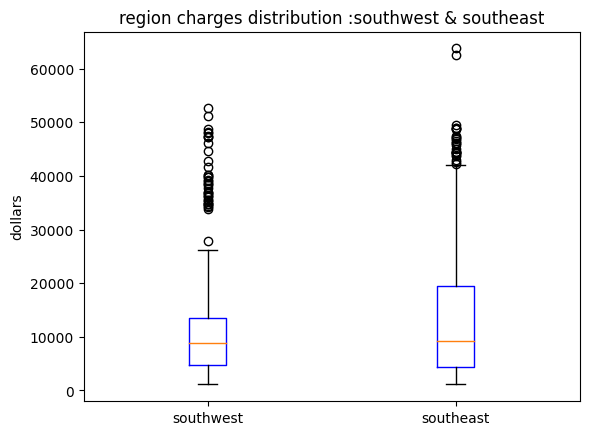

In [57]:
southwest_southeast_groups = within_group(insurance_list,"region","southwest","southeast",64)

<h1><b> Southwest vs. Southeast </b></h1>
<br><b1> The median insurance costs are higher in the southeast than the southwest, maybe it's all the great <b> BBQ </b> that the Southeast has to offer, which leads to a higher <b> BMI <b>.</b1></br>
    <b2> The Southeast has 364 patients which is the <b> largest region population of patients </b> in this dataset.</b2>

Estimated cost for an individual from yes at age 55 is: $37082.
Estimated cost for an individual from no at age 55 is: $12607.
Summary statistics for insurance costs and age for the yes and no smokers:
     group 1: yes
     -----------------------------
     yes size = 274 
     yes number of males = 159
     yes number of females = 115
     ----yes smoker -----INSURANCE CHARGES:
     yes median charges = $34455.5
     yes mode charges = $16884
     -----yes smoker-----AGE:
     mean yes smoker age: 38.51459854014598
     median yes  smoker age: 38.0
     mode yes smoker age: 19
     -----yes smoker-----BMI:
     median yes BMI: 30.0
     mode yes BMI: 28
     
     group 2: no
     ------------------------------
     no size = 1064
     no number of males = 517
     no number of females = 547
     ----no smoker -----INSURANCE CHARGES:
     no median charges = $7345.0
     no mode charges = $16884
     -----no smoker-----AGE:
     mean no smoker age: 38.51459854014598
     median no s

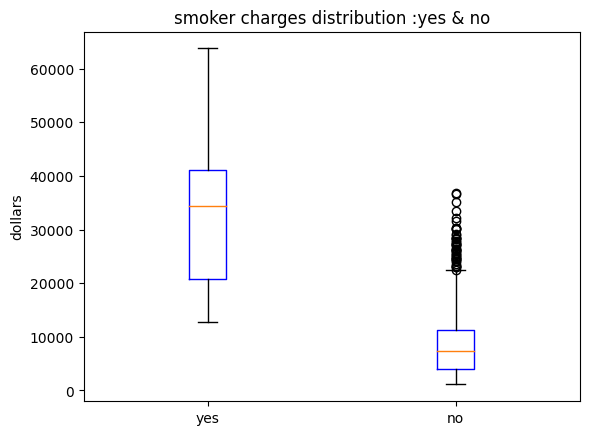

In [66]:
smokers_vs_non_smokers = within_group(insurance_list,"smoker","yes","no",55)

<h1><b>Smokers and non-smokers</b></h1>
<br><b1>The median charges for smokers is <b>\$34,455</b> while the median charges for non smokers in comparison is ..... \$7,345 dollars!!!</b1></br>
 <br>According to the linear regression that I performed, this data suggests that at 55 years of age, patients who smoke will have an insurance cost of <b> \$37,082 dollars </b></br>
  A patient smoking within this group will cost <b>\$ 24,475</b> more to insure at age 55 than a non-smoker.

Estimated cost for an individual from female at age 64 is: $18865.
Estimated cost for an individual from male at age 64 is: $20495.
Summary statistics for insurance costs and age for the female and male sexs:
     group 1: female
     -----------------------------
     female size = 662 
     female number of males = 0
     female number of females = 662
     ----female sex -----INSURANCE CHARGES:
     female median charges = $9412.5
     female mode charges = $14001
     -----female sex-----AGE:
     mean female sex age: 39.503021148036254
     median female  sex age: 40.0
     mode female sex age: 19
     -----female sex-----BMI:
     median female BMI: 30.0
     mode female BMI: 28
     
     group 2: male
     ------------------------------
     male size = 676
     male number of males = 676
     male number of females = 0
     ----male sex -----INSURANCE CHARGES:
     male median charges = $9369.0
     male mode charges = $14001
     -----male sex-----AGE:
     mean male sex age:

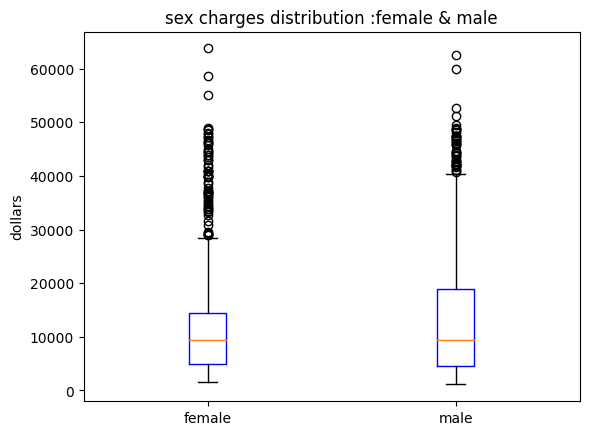

In [59]:
male_vs_female = within_group(insurance_list,"sex","female","male",64)

<h1><b1> Males vs. Females</h1></b1>
<br>There are a larger number of males <b> 676 </b> than females <b> 662 </b> in this dataset.</br>




children_single = within_group(insurance_list,"children",0,1,64)

<h1><b> Create function to compare the difference in values within a group (e.g., number of children,BMI)</b></h1>

In [74]:
def continuous_variable(data,group,lower_limit,upper_limit,reg_factor):
    lower_limit_age = []
    lower_limit_cost = []
    upper_limit_age = []
    upper_limit_cost = []
    upper_limit_list = []
    for i in data:
        if i[group] <= lower_limit:
            lower_limit_age.append(i["age"])
            lower_limit_cost.append(i["charges"])
        elif i[group] >= upper_limit:
            upper_limit_list.append(i)
            upper_limit_age.append(i["age"])
            upper_limit_cost.append(i["charges"])
            
    #print(len(lower_limit_age))  
    #print(statistics.median(lower_limit_age))
    #print(statistics.median(lower_limit_cost))
    #print(len(upper_limit_age)) 
    #print(statistics.median(upper_limit_age))
    #print(statistics.median(upper_limit_cost))
    #print(upper_limit_list)
    ul_mean_age = statistics.mean(upper_limit_age)
    ll_mean_age = statistics.mean(lower_limit_age)
    ul_age_int, ul_cost_slope = statistics.linear_regression(upper_limit_age,upper_limit_cost)
    rounded_lin_ul = round(ul_age_int * reg_factor + ul_cost_slope) 
    ll_age_int, ll_cost_slope = statistics.linear_regression(lower_limit_age,lower_limit_cost)
    rounded_lin_ll = round(ll_age_int * reg_factor + ll_cost_slope) 
    print("The insurance cost for an individual with a {group} with a value of {upper_limit} at age {reg_factor} is :$ {rounded_lin_ul}".format(reg_factor = reg_factor,group=group,upper_limit=upper_limit,rounded_lin_ul = rounded_lin_ul)) 
    print("The insurance cost for an individual with a {group} with a value of {lower_limit} at age {reg_factor} is :$ {rounded_lin_ll}".format(reg_factor = reg_factor,group=group,lower_limit=lower_limit,rounded_lin_ll = rounded_lin_ll)) 
    print("""Report for individuals with {lower_limit} {group}:
    -----------------------------------------------------------
    {group} {lower_limit} 
    size: {lower_limit_size}
    median age: {ll_median_age}
    mean age: {ll_mean_age}
    median cost: {ll_median_cost}
    -----------------------------------------------------------
    Report for individuals with {upper_limit} or greater {group}:
    size: {upper_limit_size}
    median age: {ul_median_age}
    mean age: {ul_mean_age}
    median cost {ul_median_cost}"""
    .format(lower_limit=lower_limit,group = group, upper_limit = upper_limit, lower_limit_size = len(lower_limit_age), ll_median_age = statistics.median(lower_limit_age),
               ll_median_cost = statistics.median(lower_limit_cost),upper_limit_size = len(upper_limit_age),ul_median_age = statistics.median(upper_limit_age),ul_median_cost = statistics.median(upper_limit_cost),ll_mean_age=ll_mean_age,ul_mean_age=ul_mean_age))
          
continuous_variable(insurance_list,"children",0,1,42)            

The insurance cost for an individual with a children with a value of 1 at age 42 is :$ 14574
The insurance cost for an individual with a children with a value of 0 at age 42 is :$ 13212
Report for individuals with 0 children:
    -----------------------------------------------------------
    children 0 
    size: 574
    median age: 36.0
    mean age: 38.444250871080136
    median cost: 9856.9519
    -----------------------------------------------------------
    Report for individuals with 1 or greater children:
    size: 764
    median age: 40.0
    mean age: 39.78010471204188
    median cost 9223.8295


<h1><b> Individuals with children vs. indiviudals with no children </h1></b>
<b1><br> There are <b>190</b> more individuals with one child or more in this dataset than individuals without children.</br></b1>
<br> The median age for individuals with more than one child is <b> four </b> years older. </br>  

In [76]:
continuous_variable(insurance_list,"BMI",24.9,30,40)

The insurance cost for an individual with a BMI with a value of 30 at age 40 is :$ 15473
The insurance cost for an individual with a BMI with a value of 24.9 at age 40 is :$ 11219
Report for individuals with 24.9 BMI:
    -----------------------------------------------------------
    BMI 24.9 
    size: 242
    median age: 34.5
    mean age: 36.38429752066116
    median cost: 8593.062849999998
    -----------------------------------------------------------
    Report for individuals with 30 or greater BMI:
    size: 707
    median age: 41
    mean age: 40.343705799151344
    median cost 9964.06


<h1><b> Normal Weight vs Overweight (according to BMI) individuals </h1></b>
<br>According to the linear regression model, at age 40 individuals with a <b>BMI</b> of 30 at age 40 have an insurance cost \$4,254 higher than individuals of normal or lesser weight.</br> 
<br> There are <b>465</b> more individauls in this data set with a BMI of 30 or higher. </br>
<br> The median age of individuals with a BMI of 30 or higher is <b> 6.5 </b> years older than individuals with a BMI of 24.9 or lower. </br>
The median cost of insurance for individuals with a BMI of 30 or higher is <b>\$1,371</b> higher than individuals with a lower BMI.
